#ISS projekt 2025/26 "Music search"
### Úvod
Skoro každý už někdy použil aplikace na vyhledávání hudby (Music Information Retrieval, MIR) - Shazaam a podobné. V tomto projektu si jednoduchou MIR aplikaci naprogramujete na základě toho, co jste se naučili v ISS.

### Data a cíl řešení
Vše je v https://www.fit.vut.cz/study/course/ISS/public/proj2025-26/
Budeme pracovat s WAV soubory (1 kanál, vzorkovací frekvence 16 kHz), máme pro Vás nachystáno následující:
* known.zip - soubor 706 desetisekundových zvukových klipů. Toto jsou známá audia, jsou v souborech 0.wav ... 705.wav
* valid.zip - soubor 50 testovacích pětisekundových klipů s klíčem, které audio patří ke kterému známému. Obsahuje 0.wav ... 49.wav a klíč key.txt
* login.zip - soubor 50 evaluačních pětisekundových klipů, *login* je Váš login. Obsahuje 0.wav až 49.wav. Klíče k němu máme my, budeme hodnotit, jak se Vám úloha povedla.

Dále je k disposici tento Py notebook, kde jsou nachystány funkce pro čtení audií a vyhodnocení.

Vaším úkolem je vyrobit a okomentovat funkci
* compute_similarity_matrix - vstupem je 50 neznámých audií, výstupem je matice s 50 řádky a 706 sloupci, udávající podobnosti neznámych audii k 706 známým. Větší číslo znamená větší podobnost.

Na **validačním setu**  si můžete oskórovat úspěšnost proti zadanému klíči (postup na to je dodán)

Na Vašem **osobním evaluačním setu** pak vyprodukujete matici podobností, textový výstup nám odevzdáte a budeme ho skórovat my.  

### Způsob vypracování
Projekt je možno řešit v Python notebooku, Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny, kromě specializovaných knihoven pro MIR. Porgram nesmí volat externí cloudové služby. Použití AI modelů pro "pomoc" s projektem nezakazujeme, ale
* pokuste se o vlastní řešení, generovaný kód doporučujeme jako alternativu, výsedky porovnejte
* i AI generovanému kódu byste měli rozumět - to poznáme z protokolu.

Projekt se nezaměřuje na krásu programování, všechny konstanty, jména souborů, atd. je možné zadat "natvrdo", není nutné ošetřovat chybové stavy. Není nutné mít vše úhledně zabalené do funkcí, ale pomůže to. Podmínkou je, aby Váš program byl spustitelný na Google Colab nebo na standardní fakultní distribuci Windows nebo Linux.

Součástí vypracování je protokol, ve kterém popíšete, co jste dělali - viz níže.

### Doporučené postupy řešení
Úloha je totálně na Vás, Honzovo  řešení obsahuje velmi "prasácké" porovnávání realizované pomocí výpočtu funkce krátkodobé energie s 20ms rámci a se všemi možnými normalizacemi a použití přizpůsobeného filtru. Dosahuje Top 1 accuracy  32.0 %, Top 5 accuracy  44.0 %.

Lepší cesta bude asi parametrizovat signály pomocí spektrogramu, uvědomte si, že není možné přímé srovnání, protože známé signály mají 10s, neznámé 5s a dali jsme si pozor, abychom je vybrali z různých míst známých signálů a ještě přidali trochu šumu a filtrování. Rozhodně doporučujeme si pár příkladů **poslechnout** a během ladění zobrazovat signály, spektorgramy, průběhy podobností, atd - obrázky pak rádi uvidíme v protokolu.

Nad spektrogramy můžete dělat následující:
* rozhodně doporučujeme používat pouze amplitudovou složku.
* uvažte normalizaci (např. průměrným spektrem), abyste se vyhnuli vlivům filtrování.
* uvažte, zda používat i části spektrogramu na velmi nízkých a velmi vysokých frekvencích, kde není nic užitečného
* uvažte, zda používat spektorgram s plným rozlišením, nebo ho snížit použitém širokých frekvenčních kanálů (definovaných lineárně nebo např. pomocí Mel-frekveční osy).

Pro srovnání uvažte:
* posouvání testovacího spektrogramu přes refernční (ale to je hodně hloupá metoda...)
* korelaci
* připůsobené filtrování (což je to samé jako korelace)
* Zájemci mohou zkusit detekci maxim ve spektru a jejich konfigurace a la  Shazaam, viz https://www.ee.columbia.edu/~dpwe/papers/Wang03-shazam.pdf
* cokoliv jiného, tvořivosti a nápaditosti se meze nekladou
Cokoliv vyvinete vždy oskórujte a zjistěte, zda se 1-best a 5-best přesnost na validační sadě posunula oproti Vaší předchozí verzi.

**Cílem projektu není 100% úspěšnost**, ale **pochopení a popis  toho, co děláte.** Do protokolu uvádějte co vás vedlo k vaší volbě, z jakých zdrojů jste čerpali a jakých výsledků jste dosáhli. Stručně komentujte i postupy nevedoucí k žádanému cíli.

### Odevzdání
**Termín odevzdání je první pondělí po konci semestru - 15.12.2025, 23:59**
Projekt se odevzdává prostřednictvím informačního systému. Odevzdání bude sestávat ze tří souborů:
  1. **Protokol** ve kterém popíšete, jak jste problém řešili a k jakým výsledkům jste se dopracovali. Protokol bude obsahovat
  * Na začátku Vaše jméno a login...
  * Odůvodnění zvoleného řešení
  * Popis implementace, případných problémů a jejich řešení
  * K jakým výsledkům jste se dopracovali na validační sadě

  Součástí protokolu budou doprovodné obrázky nebo grafy. Pokud použijete obrázky a grafy, které neprodukuje váš program, ale jsou převzaté (např. ilustrativní obrázek, schéma) citujte v souladu s citační etikou. Pokud budete pracovat v Python Notebooku, tvořte protokol textovými poli v notebooku, nestačí jen komentáře v kódu. Protokol bude ve formátu **PDF**. Upozorňujeme, že **pokud bude protokol obsahovat jen kód a výstupy Vašeho kódu, ale žádný popis řešení,  komentáře a hodnocení, bude hodnocen nulou nebo málo body.**

  Pokud budete psát česky nebo slovensky, nazvěte prosím soubor s protokolem  *login.pdf*, kde 'login' je Váš login. Pokud anglicky, pak *login_e.pdf*. Za psaní anglicky nejsou žádné zvláštní body (ani plus ani minus), ale *_e* nám ulehčí rozdělování Vašich řešení opravovačům.

  2. **Program**, kterým jste v rámci řešení projektu vytvořili. Program bude přehledný a rozumně komentovaný. Program bude vypisovat hodnoty a produkovat obrázky uvedené v protokolu.
  * Pokud je program Python notebook na Google Colab, odevzdáte místo programu jen textový soubor s jedinou řádkou - URL Vašeho Python Notebooku. Ten musí být pro opravovače **čitelný** a **spustitelný**.
  * Pokud program bude rozdělen do více souborů, nebo pro jeho spuštění poskytnete návod v souboru README.txt, pak všechny části zabalte do jednoho zip souboru.

  3. **Výsledek - textový soubor eval.txt**. Prosíme neměňte jeho formát, použijte export přiložený k tomuto Python notebooku. Pokud budete pracovat v Google Colab, soubor stáhnete klikem na ikonku složky v levém sloupci dole, pak soubor standardně stáhnete. Budeme používat stejnou skórovací funkci, jakou máte k disposici Vy. Pokud budete experimentovat s více metodami, prosím odevzejte pouze jeden soubor eval.txt vyprodukovaný tou nejlepší metodou a výsledky ostatních metod okomentujte a srovnejte v protokolu.

### Dotazy
Dotazy budou řešeny prostřednictvím diskuzního fóra zřízeného za tímto účelem na kartě předmětu. Bude nastaveno automatické odebírání, takže příspěvky přidané do fóra by měli vidět všichni.

### Toto zadání ...
... prosím neexportujte do protokolu, ať nemusíme 580x číst to samé. Raději zkontrolujte, zda máte na začátku Vaše jméno a login. Děkujeme!


In [ ]:
# needed
import os
import re
import soundfile as sf
from IPython.display import Audio
from IPython.display import display
import numpy as np
# recommended ...
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, ifft, fftfreq
import scipy.io
import matplotlib.pyplot as plt
# new included
from scipy.signal import find_peaks
from collections import defaultdict


In [ ]:
# read data
login = "xblizna00"
zip_file = "known" + ".zip"
for name in ("known.zip", "valid.zip", login + ".zip"):
  file = "https://www.fit.vut.cz/study/course/ISS/public/proj2025-26/" + name
  !rm $name
  !wget $file
  !unzip -o -q $name


rm: cannot remove 'known.zip': No such file or directory
--2025-11-22 14:26:07--  https://www.fit.vut.cz/study/course/ISS/public/proj2025-26/known.zip
Resolving www.fit.vut.cz (www.fit.vut.cz)... 147.229.9.65, 2001:67c:1220:809::93e5:941
Connecting to www.fit.vut.cz (www.fit.vut.cz)|147.229.9.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210919709 (201M) [application/zip]
Saving to: ‘known.zip’

known.zip           100%[===================>] 201.15M  29.4MB/s    in 10s     

2025-11-22 14:26:18 (19.2 MB/s) - ‘known.zip’ saved [210919709/210919709]

rm: cannot remove 'valid.zip': No such file or directory
--2025-11-22 14:26:23--  https://www.fit.vut.cz/study/course/ISS/public/proj2025-26/valid.zip
Resolving www.fit.vut.cz (www.fit.vut.cz)... 147.229.9.65, 2001:67c:1220:809::93e5:941
Connecting to www.fit.vut.cz (www.fit.vut.cz)|147.229.9.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7608498 (7.3M) [application/zip]
Saving to:

Top 1 accuracy  100.0 %, Top 5 accuracy  100.0 %

--- GENERUJEM GRAFY ---


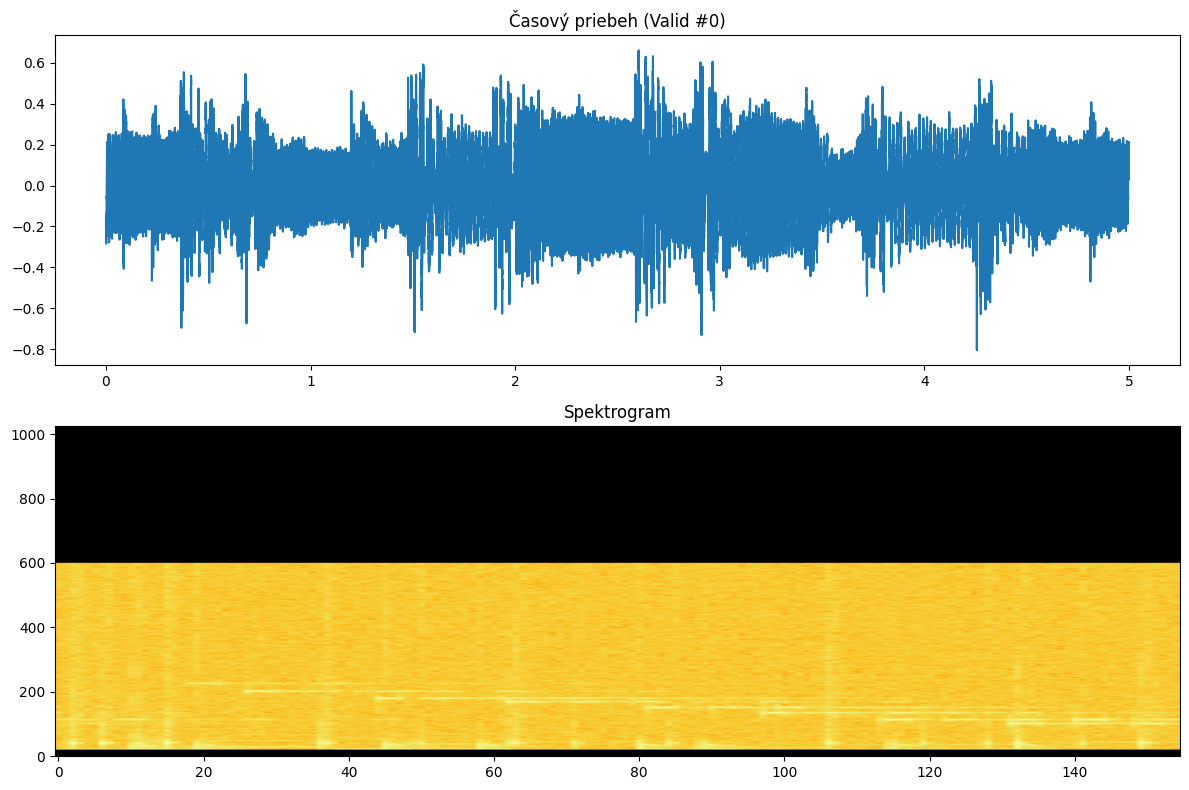

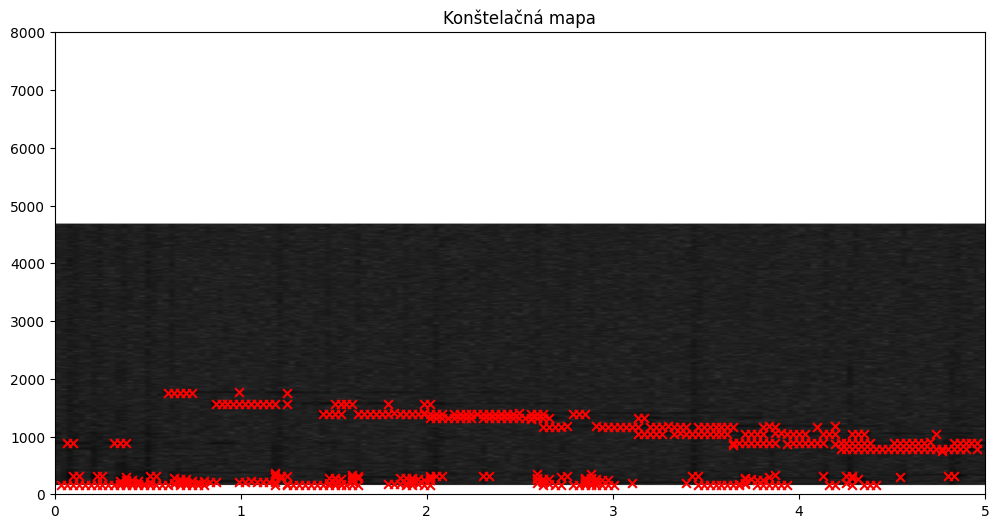

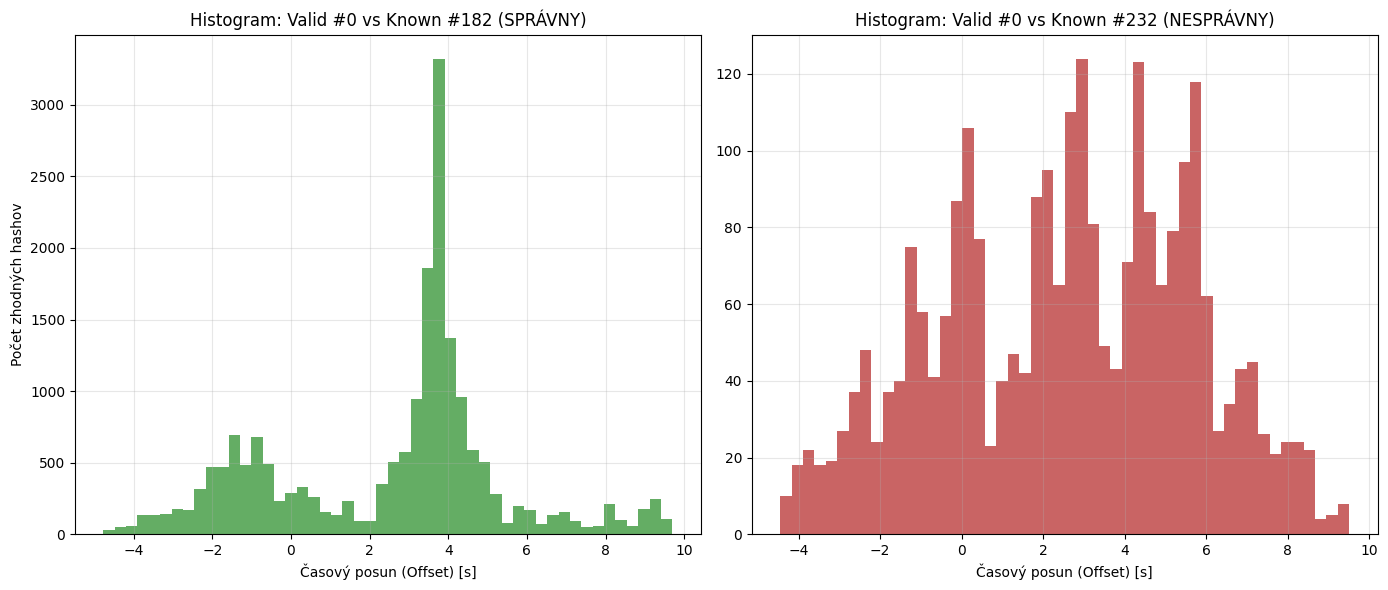

In [ ]:
# load the known data - the function returns a big matrix with all the signals

def load_data (S, dirname, count, no_samples):
  ii = 0
  for one in np.arange(count):
    S[ii], Fs = sf.read(dirname + "/" + str(one) + ".wav")
    ii = ii+1

Fs = 16000
# load known data
N_known = 706; duration_known = 10; no_samples_known = Fs * duration_known
known_signals=np.zeros([N_known, no_samples_known]); load_data(known_signals, "known", N_known, no_samples_known)
#display(Audio(known_signals[45], rate=Fs))

# load validation data
N_valid = 50; duration_valid = 5; no_samples_valid = Fs * duration_valid
valid_signals=np.zeros([N_valid, no_samples_valid]); load_data(valid_signals, "valid", N_valid, no_samples_valid)
#display(Audio(valid_signals[45], rate=Fs))

# YOUR CODE COMES HERE ! Your task is to produce a matrix 50 x 706 with similarity measures
####################################################################################################################
####################################################################################################################
####################################################################################################################
# 1. # Nastavenie Framu
frame_size_sec = 0.064      # dlzka okna bude 64ms, pri 16000 Hz to dava prave 1024 vzoriek (teda 2^6ms)
jump_size_sec = 0.032       # overlap ramcov bude nastavene na 50%, co zabezpeci novy frame kazdych 32ms (teda 1/2 * 32)....overlap = 1 - jump/frame (viac v Dokumentacii)
samples = int(Fs * frame_size_sec) # Pocet samples pre kazdy frame/window
jump = int(Fs * jump_size_sec)     # Pocet samplov pre kazdy skok ("samples" a "jump" urcene pre indexovanie pola "frames")

# 2. # Vytvorenie spektrogramu
def get_spectrogram(signal, samples, jump):
  frames = []               # Pole pre ulozenie jednotlivych framov v spektre (po rozkuskovani)
  start = 0                 # zaciatok indexu kazdeho framu v spektrograme
  # 2.0 # Pripravenie pola obsahujuceho jednotlive frames/windows/okna/...
  while ((start + samples) <= (len(signal))):
    frames.append(signal[start : (start + samples)])
    start += jump
  frames = np.array(frames) # konverzia listu na pole pre lepsiu manipulaciu s FFT

  # 2.1 # Vytvorenie Hanningovho okna zabezpecime minimalny spektralny unik vznikajuci prudkymi skokmi na zaciatku/konci framu
  window = np.hanning(samples)  # pouzil som window kvoli podobnosti s frames aj ked prislusnejsie by bolo frame
  for i in range(len(frames)):  # Aplikujeme vahovu funkciu pre kazdy frame v poli frames, tymto teda ziskame cisty spektrogram
    frames[i] = frames[i] * window

  # 2.2 # Aplikujeme Rychlu Fourrierovu transformaciu
  N_samples = 2048              # to je stvor-nasobok povodnej pretoze keby mame pocet vzorkov 512, tak 16000Hz/512 by nam dalo
                                # 31.25Hz a tony co maju 400 alebo 420Hz by neboli rozlisitelne -> 16kHz/2048 = 7.8125Hz
  spectrogram = np.fft.rfft(frames, n = N_samples, axis = 1)

  # 2.3 # Cisto magnitudova zlozka  # Magnitudovu zlozku vyrobime absolutnou hodnotou teda umocnime realnu cast aj imaginarnu tie scitame
  spectrogram = np.abs(spectrogram) # a odmocnime
  spectrogram[:, :20] = 0
  spectrogram[:, 600:] = 0

  return spectrogram

# 3. # Funkcia prevedie spektrogram do logaritmickej formy, umozni jednoduchsie hladata maxima
def spec_to_spec_log(spectrogram):
  not_zero = 0.000000000000001  # potrebujeme zabranit vzniku log(0)
  return np.log(spectrogram + not_zero)

# 4. # Hladanie lokalnych maxim
def search_peaks(spectrogram):
  peaks = []                    # Pole peakov
  for time in range(spectrogram.shape[0]):
    peaky_peaks, _ = find_peaks(spectrogram[time], height=np.max(spectrogram[time])*0.5) # Prah beriem zatial 0.5, pre lepsiu presnost by bolo vhodne
    for frequency in peaky_peaks:                                                        # zobrat 0.4 a menej ale opat program by bol pomalsi
      peaks.append((frequency, time))
  return peaks

# 5. # Hashovanie (VELKA UPRAVA - BINNING)
def make_hash(peaks):
  hashes = []
  neighbors = 5                 # opat cim viac susedov budeme uvazovat, tym presnejsi budeme ale o to pomalsi bude vypocet

  n_peaks = len(peaks)
  for i in range(n_peaks):      # iterujeme cez vsetky anchor peaky, a pre kazdy
    for j in range(1, neighbors+1):
      if i + j < n_peaks:       # anchor point sa pozrieme na jeho "neighbors" susedov (nasledovnikov)
        # 5.0 # Ziskame frekvenciu Anchor bodu a Cieloveho (Target) bodu
        freq1 = peaks[i][0]
        freq2 = peaks[i + j][0]
        # 5.1 # Ziskame cas opat Anchor a Target bodu
        time1 = peaks[i][1]
        time2 = peaks[i + j][1]
        # 5.2 # Vypocitam deltu (casovy rozdiel)
        delta = time2 - time1
        # 5.3 # Vytvorim hash ktory sa skalda z frekvencie oboch bodov a z ich casoveho rozdielu
        new_hash = hash((freq1, freq2, delta)) & 0xffffffff # a pridam ich do pola hashov
        hashes.append((new_hash, time1))
  return hashes

# 6. # Fingerprinting - a.k.a zavolam vsetky pomocne funkcie
def make_up_to_fingerprint(signal):
  spec = get_spectrogram(signal, samples, jump) # Vytvori spektrogram
  log_spec = spec_to_spec_log(spec)             # zlogaritmuje ho
  peaks = search_peaks(log_spec)                # najde lokalne extremy (maxima)
  hashes = make_hash(peaks)                     # vytvori hashe ktore vrati hlavenj funkcii pre tvorbu matice
  return hashes

# 7. # Finalna funkcia
def compute_similarity_matrix(query_signals, N_query ,known_signals, N_known):
    # 7.0 # Vygenerujem vsetky finger-printy pre valid data a potom pre known data a ulozim ich do poli
    fps_query = []
    for i in range(N_query):
        fps_query.append(make_up_to_fingerprint(query_signals[i]))

    fps_known = []
    for i in range(N_known):
        fps_known.append(make_up_to_fingerprint(known_signals[i]))

    # 7.1 # Vytvorim si databazu hashov, kde postupne naukladam vsetky signaly (spracovane :D)
    hash_database = defaultdict(list)
    for song_id in range(N_known):
        for (h, t) in fps_known[song_id]:
            hash_database[h].append((song_id, t))

    # 7.2 # Optimalizacia, zistime ktore hashe sa prilis casto opakuju,
    # pravdepodobne pojde o nejaky sum/ticho/nieco co mozeme zahodit
    hash_counts = []
    for v in hash_database.values():
        count = len(v)
        hash_counts.append(count)

    if hash_counts:
        hashes_to_remove = []
        # Vytvorim hranicu pre 1%-il najviac opakovanych hashov a tych sa potom zbavime
        # (opat dalo by sa hrat s nastavenim hranice, ist pod 5%-il avsak zase to iste pravidlo)
        # presnost a rychlost maju linearny vztah
        limit = np.percentile(hash_counts, 99)
        for hash, v in hash_database.items():
          if len(v) > limit:
            hashes_to_remove.append(hash)

        for hash in hashes_to_remove:
            del hash_database[hash]

    # 7.3 # Porovnanie (Scooring) - Inicializujeme vyslednu maticu
    similarities = np.zeros((N_query, N_known))

    # Prejdeme cez kazdy valid signal
    for i in range(N_valid):
        # budeme pocitat offset pri danych songoch
        offsets_counter = defaultdict(int)
        #Prejdeme cez vsetky valid hashe
        for (h, query_t) in fps_query[i]:
            if h in hash_database:  # Ak je dany hash v nasej databaze, zistime v ktorcyh
                for (known_song_id, known_t) in hash_database[h]: # songoch sa vyskytuje a
                    offset = known_t - query_t # vypocitame offset
                    # Pouzivame tuple (id, offset) ako kluc pre rychlost (s paddom 1)
                    offsets_counter[(known_song_id, offset)] += 1

        # Budeme hladat najvacsie skore pre kazdy known_song
        song_scores = defaultdict(int)
        for (song_id, _), count in offsets_counter.items():
            if count > song_scores[song_id]:
                song_scores[song_id] = count

        # Nakoniec zapiseme finalne skore do matice_podobnosti
        for song_id, score in song_scores.items():
            similarities[i, song_id] = score

    return similarities

####################################################################################################################
####################################################################################################################
####################################################################################################################
# evaluation - the function produces Top-1 and Top-5 accuracy on validation data
def eval(scores, key):
  indices = np.flip(np.argsort(scores), axis=-1)
  top1acc = np.sum(key == indices[:,0]) / indices.shape[0]
  top5acc = 0
  for ii in range(5):
    top5acc += np.sum(key == indices[:,ii])
  top5acc /=  indices.shape[0]
  return top1acc, top5acc

key = np.loadtxt("valid/key.txt", delimiter = ',', usecols=(1), dtype ='int')

# here comes the computation and evaluation on validation data ...
scores_matrix = compute_similarity_matrix(valid_signals, N_valid, known_signals, N_known)
#print (key)
top1, top5 = eval(scores_matrix, key)
print("Top 1 accuracy ", top1 * 100, "%, Top 5 accuracy ", top5 * 100, "%" )

# NOW on YOUR DATA ! Your task is to produce a matrix 50 x 706 with similarity measures

# load your data
N_eval = 50; duration_eval = 5; no_samples_eval = Fs * duration_eval
eval_signals=np.zeros([N_eval, no_samples_eval]); load_data(eval_signals, login, N_eval, no_samples_eval)
#display(Audio(valid_signals[45], rate=Fs))

# YOUR CODE COMES HERE ! Your task is to produce a matrix 50 x 706 with similarity measures

# complete stupid dolution just for testing the export of file with results ...
scores_matrix = compute_similarity_matrix(eval_signals, N_eval, known_signals, N_known)

# export it
np.savetxt("eval.txt", scores_matrix)

# to download it in Google Colab click on the folder icon in the left column, find eval.txt and download it as usually.

# Generator grafov
print("\n--- GENERUJEM GRAFY ---")
try:
    plt.rcParams['figure.figsize'] = (12, 8)

    valid_idx = 0
    key = np.loadtxt("valid/key.txt", delimiter=',', usecols=(1), dtype='int')
    correct_known_idx = key[valid_idx]
    wrong_known_idx = (correct_known_idx + 50) % N_known

    signal_q = valid_signals[valid_idx]

    # Graf 1
    spec = get_spectrogram(signal_q, samples, jump)
    log_spec = spec_to_spec_log(spec)

    plt.figure()
    plt.subplot(2, 1, 1)
    time_axis = np.linspace(0, len(signal_q) / Fs, len(signal_q))
    plt.plot(time_axis, signal_q)
    plt.title(f"Časový priebeh (Valid #{valid_idx})")

    plt.subplot(2, 1, 2)
    plt.imshow(log_spec.T, origin='lower', aspect='auto', cmap='inferno')
    plt.title("Spektrogram")
    plt.tight_layout()
    plt.show()

    # Graf 2 - Peaky
    peaks = search_peaks(log_spec)
    peak_times = [p[1] * jump_size_sec + frame_size_sec/2 for p in peaks]
    peak_freqs = [p[0] * (Fs/2) / 1024 for p in peaks]

    plt.figure(figsize=(12, 6))
    plt.imshow(log_spec.T, origin='lower', aspect='auto', cmap='gray_r', extent=[0, 5, 0, 8000])
    plt.scatter(peak_times, peak_freqs, c='red', marker='x', s=40)
    plt.title("Konštelačná mapa")
    plt.show()

    # Graf 3 - Histogramy


    # Support ufnkcia ktora vypocita rozdiely
    def calculate_offsets(fp_q, fp_db):
        offsets = []
        # Rychla mapa pre DB hashov
        db_map = defaultdict(list)
        for h, t in fp_db:
            db_map[h].append(t)

        # Hladame zhodne hashe a pocitamr rozdiel (offset)
        for h, t_q in fp_q:
            if h in db_map:
                for t_db in db_map[h]:
                    offsets.append(t_db - t_q)
        return offsets

    # 1. Vygenerujeme fingerprinty pre konkretne porovnanie
    fp_q = make_up_to_fingerprint(signal_q)
    fp_correct = make_up_to_fingerprint(known_signals[correct_known_idx])
    fp_wrong = make_up_to_fingerprint(known_signals[wrong_known_idx])

    # 2. Vypocitame offsety
    offsets_correct = calculate_offsets(fp_q, fp_correct)
    offsets_wrong = calculate_offsets(fp_q, fp_wrong)

    # 3. Vykreslenie
    plt.figure(figsize=(14, 6))

    # Graf A: GREEN graf
    plt.subplot(1, 2, 1)
    offsets_sec_correct = np.array(offsets_correct) * jump_size_sec

    plt.hist(offsets_sec_correct, bins=50, color='forestgreen', alpha=0.7)
    plt.title(f"Histogram: Valid #{valid_idx} vs Known #{correct_known_idx} (SPRÁVNY)")
    plt.xlabel("Časový posun (Offset) [s]")
    plt.ylabel("Počet zhodných hashov")
    plt.grid(True, alpha=0.3)

    # Graf B: RED graf
    plt.subplot(1, 2, 2)
    offsets_sec_wrong = np.array(offsets_wrong) * jump_size_sec

    plt.hist(offsets_sec_wrong, bins=50, color='firebrick', alpha=0.7)
    plt.title(f"Histogram: Valid #{valid_idx} vs Known #{wrong_known_idx} (NESPRÁVNY)")
    plt.xlabel("Časový posun (Offset) [s]")
    plt.grid(True, alpha=0.3)

    plt.ylim(plt.subplot(1, 2, 1).get_ylim())
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Grafy sa nepodarilo vykreslit!")

